<a href="https://colab.research.google.com/github/sonalitandel231/ml_ai_notebooks/blob/main/day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
y = df['target']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
x = df.drop('target',axis=1)

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
print(x_train.shape)

(212, 13)


In [ ]:
print(y_train.shape)

(212,)


In [ ]:
print(x_test.shape)

(91, 13)


In [ ]:
print(y_test.shape)

(91,)


##Logistic Regression - GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 100, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

In [ ]:
print(clf_lr.best_params_)

{'C': 2, 'solver': 'liblinear'}


In [ ]:
test_pred = clf_lr.predict(x_test)

In [ ]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.8791208791208791

Previously we had got an accuracy of 79.12% which is now improved to 87.9%

##KNeighborsClassifier - GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,10, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
print(clf_knn.best_params_)

{'n_neighbors': 7}


In [ ]:
test_pred_knn = clf_knn.predict(x_test)

In [ ]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.6593406593406593

previously we had got an accuracy score of 60.4% which is now improved to 65.9% using GridSearchCV

##DecisionTreeClassifier - GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(1,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)

In [ ]:
print(clf_dtc.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}


In [ ]:
test_pred_dtc = clf_dtc.predict(x_test)

In [ ]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.8131868131868132

previously we had got an accuracy score of 78% which is improved to 81.3% using GridSearchCV

##CONFUSION MATRIX
since we got a accuracy of 84% using Linear-Regression, we use its predicted accuracy to find the confusion matrix


##Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[36,  3],
       [ 8, 44]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.85      0.94      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



##KNeighborsClassifier

In [ ]:
confusion_matrix(test_pred_knn,y_test)

array([[26, 13],
       [18, 34]])

In [ ]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        44
           1       0.65      0.72      0.69        47

    accuracy                           0.66        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.66      0.66      0.66        91



##DecisionTreeClassifier

In [ ]:
confusion_matrix(test_pred_dtc,y_test)

array([[32,  5],
       [12, 42]])

In [ ]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



From the above comparisions we come to a conclusion that DecisionTreeClassifier provides a better Recall along with accuracy when compared to other Modals

##To Plot a Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score

In [ ]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [ ]:
#keeping only the 2nd column (positive values) and discarding the 1st column (negative values)
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [ ]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

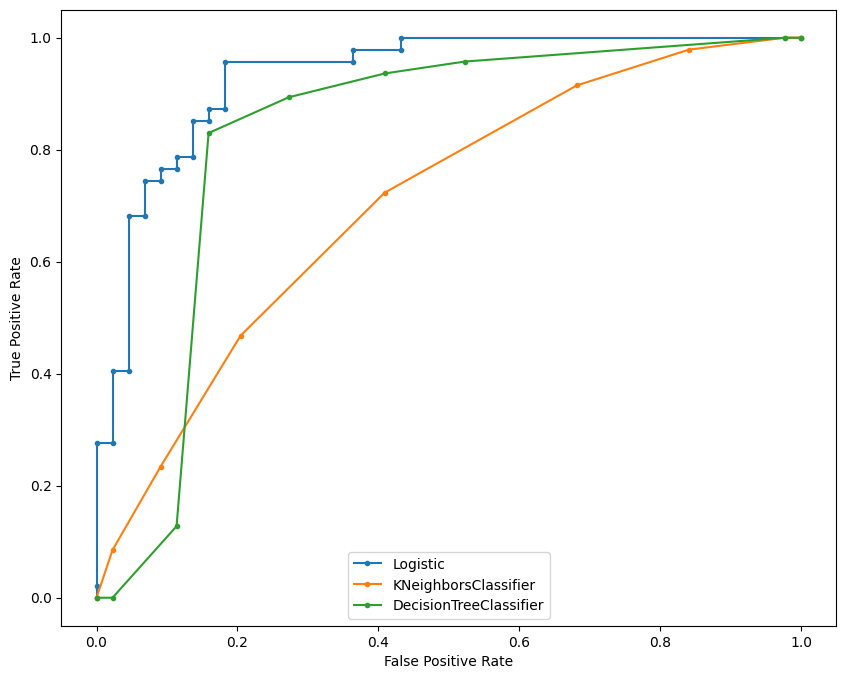

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

From the above Graph it can be clearly interpreted that the AREA under the LOGISTIC curve is more than the other two curves and hence provides a better accuracy over the other two...

Apparantly we can also check the roc_auc_score using the below module

In [ ]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 93.10000000000001 %
Logistic : ROC AUC = 70.5 %
Logistic : ROC AUC = 82.5 %


The roc_auc_score of LogisticRegression is 93.1% which is much greater than the other two

##Code to allow user to query by providing details of a patient as input and determining whether the patient lives or dies

In [ ]:
#from pandas.core.window.expanding import ExpandingGroupby
#from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

#def Prediction() :
 # age = int(input("Age of the Patient :- "))
 # sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
 # cp = int(input("Chest Pain Type :- "))
 # trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
 # slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
  #new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

 # new_patient = new_patient.reshape(1,-1) #converting to 2D array

 # if clf_lr.predict(new_patient) == 0 :
   # return "The Patient with the above provided Vitals Dies!!!"
 # else :
   # return "The Patient with the above provided vitals Lives!!!"

#for i in range(n) :
 # print(Prediction())

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient :- 63
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type :- 3
Resting Blood Pressure :- 145
Serum Cholestrol :- 233
Fasting Blood Sugar :- 1
Resting ElectroCardiographic Result :- 0
Maximum Heart Rate Achieved :- 150
Exercise-include angina (1 - True, 0 - False) :- 0
ST Depression induced by Exercise relative to Rest :- 2.3
Slope of Peak Exercise ST segment :- 0
No. of Major Vessels (0-3) :- 0
Thalasemia Indicator :- 1
The Patient with the above provided vitals Lives!!!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


-> According To The Above Provided Vitals taken from a random patient... our modal has predicted that the Patient Lives !!!
-> The model can be used to check the Status of any number of Patients at a time hence saving time !!!